# 1-. Lectura de datos 


In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import json as js
from datetime import datetime
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
ruta = '/Users/usuario/Desktop/Luis/Ts/Base de datos'  #Pongan la carpeta donde este su base de datos
l_arch = os.listdir(ruta)
l_arch

['2018_Yellow_Taxi_Trip_Data.csv', 'catalogo.json']

In [3]:
muestra= [
    x
    for x in pd.read_csv(os.path.join(ruta, l_arch[0]), chunksize=10000000)
]

In [4]:
df=pd.concat(muestra,ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112234626 entries, 0 to 112234625
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
dtypes: float64(8), int64(6), object(3)
memory usage: 14.2+ GB


## 1.1-. Muestra aleatoria 

Decidimos armar una muestra aleatoria representativa de tamaño n ,con el siguiente calculo 
### $$n=\frac{Z^2p(1-p)}{\frac{e^2}{1+\frac{Z^2p(1-p)}{Ne^2}}}$$

Donde:

Z es el score de los intervalos de confianza

N el tamaño de la población

p es la desviación estándar 

_e_ es el margen de error 

Como no sabemos cuanta  desviación estándar de la población le asignamoes el valor  0.5 para asegurarse de que la muestra sea lo suficientemente grande, ademas escojeomos un error de $0.01\%$ ademas con tenemos un nivel de confianza de $99\% , Z=2.576$  y nuestra $N = 112234625$, asi que 

### $$n=\frac{2.576^2 0.5 (1-0.5)}{\frac{0.001^2}{1+\frac{2.576^2 0.5 (1-0.5)}{112234625*0.001^2}}}=1683465$$

In [6]:
x=random.sample(range(0,112234624),1683465)

In [16]:
df_muestra=df.iloc[x,]

In [18]:
df_muestra.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12497563,2,11/06/2018 12:42:24 PM,11/06/2018 12:54:49 PM,1,0.87,1,N,229,237,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80
49556802,1,02/16/2018 07:19:59 PM,02/16/2018 07:26:41 PM,0,1.50,1,N,48,158,1,7.0,1.0,0.5,1.32,0.00,0.3,10.12
48232374,1,02/12/2018 04:50:01 PM,02/12/2018 05:43:55 PM,3,22.60,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
71005448,2,03/28/2018 07:58:44 PM,03/28/2018 08:07:14 PM,1,1.61,1,N,68,211,1,8.0,1.0,0.5,1.00,0.00,0.3,10.80
11286082,1,11/02/2018 06:34:49 AM,11/02/2018 06:50:07 AM,1,2.70,1,N,79,230,1,12.5,0.0,0.5,2.65,0.00,0.3,15.95


In [ ]:
df_muestra.to_csv('muestra.csv',index=False)

Hacemos un csv de la muestra para tener la muestra mas rapido y no cargar el codigo pasado, ya que es mas facil correr directamente el csv para otra persona, o también nos sirve de respando en caso de que el kernel no funcione 

In [3]:
df_muestra=pd.read_csv('muestra.csv')

In [4]:
df_muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683465 entries, 0 to 1683464
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1683465 non-null  int64  
 1   tpep_pickup_datetime   1683465 non-null  object 
 2   tpep_dropoff_datetime  1683465 non-null  object 
 3   passenger_count        1683465 non-null  int64  
 4   trip_distance          1683465 non-null  float64
 5   RatecodeID             1683465 non-null  int64  
 6   store_and_fwd_flag     1683465 non-null  object 
 7   PULocationID           1683465 non-null  int64  
 8   DOLocationID           1683465 non-null  int64  
 9   payment_type           1683465 non-null  int64  
 10  fare_amount            1683465 non-null  float64
 11  extra                  1683465 non-null  float64
 12  mta_tax                1683465 non-null  float64
 13  tip_amount             1683465 non-null  float64
 14  tolls_amount      

## 1.2-. Catalogos 

Como ya tenemos un catalogo en json simplemte los cargamos 

In [5]:
catalogos = js.load(open(os.path.join(ruta, l_arch[-1]), 'rb'))

Como no tenemos el catalogo de las zonas pero si tenemos un _csv_ solamente lo cargaremos 

In [6]:
PULocationID = pd.read_csv('taxi+_zone_lookup.csv')
PULocationID.columns = [
    'PULocationID', 'PUBorough', 'PUZone', 'PUservice_zone'
]
DOLocationID = pd.read_csv('taxi+_zone_lookup.csv')
DOLocationID.columns = [
    'DOLocationID', 'DOBorough', 'DOZone', 'DOservice_zone'
]

### 1.2.1-. Creacion de tuplas de catalogos 

In [7]:
l_cat = [(x,
          pd.DataFrame.from_dict(
              catalogos[x], orient='index',
              columns=["x_%s" % x]).reset_index().rename(columns={'index': x}))
         for x in catalogos.keys()]
l_catzon = [('PULocationID', PULocationID), ('DOLocationID', DOLocationID)]

## 1.3-. Unir datos con los catalogos 

In [8]:
for key, cat in l_cat:
    print(key)
    df_muestra[key] = df_muestra[key].fillna(9999).astype('S')
    cat[key] = cat[key].astype('S')
    df_muestra = df_muestra.merge(cat, on=key, how='left').drop(
        key, axis=1).rename(columns={'x_%s' % key: key})

VendorID
RatecodeID
store_and_fwd_flag
payment_type


In [9]:
for key, cat in l_catzon:
    print(key)
    df_muestra[key] = df_muestra[key].fillna(9999).astype('S')
    cat[key] = cat[key].astype('S')
    df_muestra = df_muestra.merge(cat, on=key, how='left').drop(
        key, axis=1).rename(columns={'x_%s' % key: key})

PULocationID
DOLocationID


In [10]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,VendorID,RatecodeID,store_and_fwd_flag,payment_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,11/06/2018 12:42:24 PM,11/06/2018 12:54:49 PM,1,0.87,9.0,0.0,0.5,0.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Cash,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
1,02/16/2018 07:19:59 PM,02/16/2018 07:26:41 PM,0,1.50,7.0,1.0,0.5,1.32,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,Clinton East,Yellow Zone,Manhattan,Meatpacking/West Village West,Yellow Zone
2,02/12/2018 04:50:01 PM,02/12/2018 05:43:55 PM,3,22.60,52.0,0.0,0.5,0.00,5.76,0.3,...,Creative Mobile Technologies,JFK,not a store and forward trip,Cash,Queens,JFK Airport,Airports,Manhattan,Clinton East,Yellow Zone
3,03/28/2018 07:58:44 PM,03/28/2018 08:07:14 PM,1,1.61,8.0,1.0,0.5,1.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Credit card,Manhattan,East Chelsea,Yellow Zone,Manhattan,SoHo,Yellow Zone
4,11/02/2018 06:34:49 AM,11/02/2018 06:50:07 AM,1,2.70,12.5,0.0,0.5,2.65,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,East Village,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683460,12/22/2018 03:38:53 PM,12/22/2018 03:57:07 PM,1,1.58,12.0,0.0,0.5,0.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Cash,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
1683461,03/18/2018 12:55:53 AM,03/18/2018 01:07:14 AM,0,2.20,10.0,0.5,0.5,1.00,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,Chinatown,Yellow Zone,Manhattan,Flatiron,Yellow Zone
1683462,11/15/2018 02:42:36 AM,11/15/2018 03:03:16 AM,1,9.30,28.5,0.5,0.5,8.85,5.76,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Queens,Forest Hills,Boro Zone
1683463,12/12/2018 05:57:51 PM,12/12/2018 06:19:49 PM,4,5.17,19.5,1.0,0.5,4.26,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Credit card,Manhattan,Battery Park City,Yellow Zone,Manhattan,Lincoln Square West,Yellow Zone


## 1.4-. Cambio de tipo de dato 

Vemos que el unico tipo de dato que no coincide solo las fechas, asi que las pondremos en tipo date 


In [11]:
df_muestra['tpep_pickup_datetime'] = df_muestra['tpep_pickup_datetime'].map(
    lambda x: datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df_muestra['tpep_dropoff_datetime']=df_muestra['tpep_dropoff_datetime'].map(
    lambda x: datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df_muestra['tpep_pickup_datetime']=df_muestra['tpep_pickup_datetime'].map(lambda x:x.replace(year=2018))
df_muestra['tpep_dropoff_datetime']=df_muestra['tpep_dropoff_datetime'].map(lambda x:x.replace(year=2018))

In [12]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,VendorID,RatecodeID,store_and_fwd_flag,payment_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2018-11-06 12:42:24,2018-11-06 12:54:49,1,0.87,9.0,0.0,0.5,0.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Cash,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
1,2018-02-16 19:19:59,2018-02-16 19:26:41,0,1.50,7.0,1.0,0.5,1.32,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,Clinton East,Yellow Zone,Manhattan,Meatpacking/West Village West,Yellow Zone
2,2018-02-12 16:50:01,2018-02-12 17:43:55,3,22.60,52.0,0.0,0.5,0.00,5.76,0.3,...,Creative Mobile Technologies,JFK,not a store and forward trip,Cash,Queens,JFK Airport,Airports,Manhattan,Clinton East,Yellow Zone
3,2018-03-28 19:58:44,2018-03-28 20:07:14,1,1.61,8.0,1.0,0.5,1.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Credit card,Manhattan,East Chelsea,Yellow Zone,Manhattan,SoHo,Yellow Zone
4,2018-11-02 06:34:49,2018-11-02 06:50:07,1,2.70,12.5,0.0,0.5,2.65,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,East Village,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683460,2018-12-22 15:38:53,2018-12-22 15:57:07,1,1.58,12.0,0.0,0.5,0.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Cash,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
1683461,2018-03-18 00:55:53,2018-03-18 01:07:14,0,2.20,10.0,0.5,0.5,1.00,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,Chinatown,Yellow Zone,Manhattan,Flatiron,Yellow Zone
1683462,2018-11-15 02:42:36,2018-11-15 03:03:16,1,9.30,28.5,0.5,0.5,8.85,5.76,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Queens,Forest Hills,Boro Zone
1683463,2018-12-12 17:57:51,2018-12-12 18:19:49,4,5.17,19.5,1.0,0.5,4.26,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Credit card,Manhattan,Battery Park City,Yellow Zone,Manhattan,Lincoln Square West,Yellow Zone


# 2-. Limpieza de datos 

## 2.1-. Visualización de datos inconsistentes 

In [13]:
df_muestra.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.683465e+06,1.683465e+06,1.683465e+06,1.683465e+06,1.683465e+06,1.683465e+06,1.683465e+06,1.683465e+06,1.683465e+06
mean,1.596098e+00,2.929203e+00,1.299412e+01,3.309224e-01,4.971086e-01,1.872408e+00,3.472416e-01,2.995289e-01,1.634505e+01
std,1.241695e+00,3.789748e+00,1.325921e+01,4.654262e-01,4.205959e-02,2.615709e+00,1.804324e+00,1.612002e-02,1.574184e+01
min,0.000000e+00,0.000000e+00,-3.170000e+02,-4.500000e+00,-5.000000e-01,-8.000000e+01,-1.500000e+01,-3.000000e-01,-3.178000e+02
25%,1.000000e+00,9.600000e-01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,1.000000e+00,1.600000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.400000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,3.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,9.000000e+00,3.808300e+02,7.011500e+03,4.000000e+01,3.000000e+00,2.950000e+02,7.676600e+02,1.000000e+00,7.012800e+03


Vemos que en **_mta_tax_** y **_improvement_surcharge_** tiene datos con valores que no concuerdan con los constantes;los cuales son $ 0.5,0.3 $ respectivamente  podriamos esperar valores negativos de estos puesto que vemos que hay precios negativos y eso sea un erro de captura. Pero vemos que el maximo de **_mta_tax_** es 3 y el maximo de **_improvement_surcharge_** es 1 asi que tenemos un error en los maximos solamente puesto que en los minimos tenemos los valores constantes pero solamente negativos.

Veamos la cantindad estos datos que estan así 

In [14]:
aux=df_muestra[df_muestra['mta_tax']>0.5][['mta_tax']].copy().assign(n=1)
aux.n.count()

4

Vemos que tenemos 4 datos con **_mta_tax_** $>0.5$.

Ahora veamos los datos de **_improvement_surcharge_**

In [15]:
aux=df_muestra[df_muestra['improvement_surcharge']>0.3][['improvement_surcharge']].copy().assign(n=1)
aux.n.count()

4

Vemos que si son los mismos, y si los son los mismos veremos los datos de la parte de pago 

In [16]:
df_muestra[df_muestra['improvement_surcharge']>0.3][['mta_tax','improvement_surcharge']]


,mta_tax,improvement_surcharge
201021,3.0,1.0
236128,3.0,1.0
1063745,0.0,1.0
1171652,3.0,1.0


In [17]:
df_muestra[df_muestra['mta_tax']>0.5][['mta_tax','improvement_surcharge']]

,mta_tax,improvement_surcharge
201021,3.00,1.0
236128,3.00,1.0
1006645,0.87,0.0
1171652,3.00,1.0


Vemos que solamente que conciden en 3 

In [18]:
df_muestra[
    (df_muestra['mta_tax']>0.5) & (df_muestra[
        'improvement_surcharge']>0.3)][['mta_tax','improvement_surcharge']]

,mta_tax,improvement_surcharge
201021,3.0,1.0
236128,3.0,1.0
1171652,3.0,1.0


Podemos concluir que podemos cambiar esos valores por los reales 

Ahora vamos Los tipos de pago 

In [19]:
aux = df_muestra[['payment_type']].copy().assign(n=1)
aux.groupby('payment_type').count()

,n
payment_type,
Cash,503391
Credit card,1168709
Dispute,2451
No charge,8914


<AxesSubplot:xlabel='payment_type'>

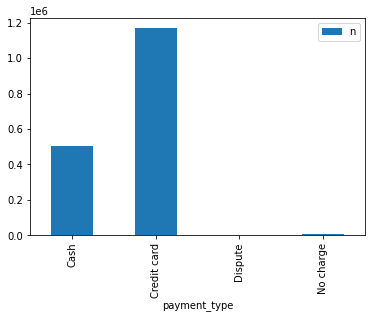

In [20]:
aux.groupby('payment_type').count().plot(kind='bar')

Vemos que hay una fraccion pequña de **_Dispute_** y **_No charge_**.

En teoria **_No charge_** el monto y la distancia tiene que ser esto vemos si los numeros cuadran 

In [21]:
aux=df_muestra[
    (df_muestra['payment_type']=='No charge') &
(df_muestra['total_amount']==0)&
(df_muestra['trip_distance']==0)][['payment_type']].copy().assign(n=1)
aux.groupby('payment_type').count()

,n
payment_type,
No charge,3


Ahora vemos lo mismo pero con el pago 0

In [22]:
aux=df_muestra[
    (df_muestra['payment_type']=='No charge') &
(df_muestra['total_amount']==0)][['payment_type']].copy().assign(n=1)
aux.groupby('payment_type').count()

,n
payment_type,
No charge,3


Ahora con la distancia 0 

In [23]:
aux=df_muestra[
    (df_muestra['payment_type']=='No charge') &
(df_muestra['trip_distance']==0)][['payment_type']].copy().assign(n=1)
aux.groupby('payment_type').count()

,n
payment_type,
No charge,1448


Ahora vemos solamente con pago 0 y distancia 0 

In [24]:
aux=df_muestra[
(df_muestra['total_amount']==0)&
(df_muestra['trip_distance']==0)][['payment_type']].copy().assign(n=1)
aux.groupby('payment_type').count()

,n
payment_type,
Cash,72
Credit card,112
No charge,3


In [25]:
aux=df_muestra[['fare_amount','extra','mta_tax','tip_amount',
          'tolls_amount','improvement_surcharge','total_amount']].copy()
aux.groupby(aux['total_amount']<0).count()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
total_amount,,,,,,,
False,1682370,1682370,1682370,1682370,1682370,1682370,1682370
True,1095,1095,1095,1095,1095,1095,1095


## 2.2-. Limpieza de datos 

Eliminamos los valores negativos 

In [26]:
df_muestra=df_muestra.drop(df_muestra[df_muestra['total_amount']<0].index,axis=0)

Ponemos los valores constantes correspondientes, en este caso son los impuestos y el cargo extra

In [27]:
df_muestra['mta_tax'] = df_muestra['mta_tax'].map(
    lambda x: x if x == 0.5 else (0 if x == 0 else 0.5) )
df_muestra['improvement_surcharge'] = df_muestra['improvement_surcharge'].map(
    lambda x: x if x == 0.3 else (0 if x == 0 else 0.3))

Ahora pongamos los valores correctos del total, lo que vendria siendo la suma total de los pagos 

In [28]:
def total(data):
    pago=['fare_amount','extra','mta_tax','tip_amount',
          'tolls_amount','improvement_surcharge']
    aux=[round(x,2) for x in data[pago].sum(axis=1)]
    data['total_amount']=aux 
    

In [29]:
total(df_muestra)

In [30]:
df_muestra.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.682370e+06,1.682370e+06,1.682370e+06,1.682370e+06,1.682370e+06,1.682370e+06,1.682370e+06,1.682370e+06,1.682370e+06
mean,1.596011e+00,2.930805e+00,1.300846e+01,3.313654e-01,4.977457e-01,1.873675e+00,3.475223e-01,2.999174e-01,1.635869e+01
std,1.241638e+00,3.790328e+00,1.324384e+01,4.650505e-01,3.349700e-02,2.615334e+00,1.804730e+00,4.976126e-03,1.572387e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,9.600000e-01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,1.000000e+00,1.600000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.400000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,3.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,9.000000e+00,3.808300e+02,7.011500e+03,4.000000e+01,5.000000e-01,2.950000e+02,7.676600e+02,3.000000e-01,7.012800e+03


Vemos que hay valores negativos en extra, asi que lo eliminaremos 

In [31]:
df_muestra=df_muestra.drop(df_muestra[df_muestra['extra']<0].index,axis=0)

In [32]:
df_muestra.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.682369e+06,1.682369e+06,1.682369e+06,1.682369e+06,1.682369e+06,1.682369e+06,1.682369e+06,1.682369e+06,1.682369e+06
mean,1.596011e+00,2.930806e+00,1.300846e+01,3.313659e-01,4.977457e-01,1.873676e+00,3.475225e-01,2.999174e-01,1.635869e+01
std,1.241639e+00,3.790329e+00,1.324384e+01,4.650502e-01,3.349701e-02,2.615334e+00,1.804730e+00,4.976127e-03,1.572387e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,9.600000e-01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,1.000000e+00,1.600000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.400000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,3.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,9.000000e+00,3.808300e+02,7.011500e+03,4.000000e+01,5.000000e-01,2.950000e+02,7.676600e+02,3.000000e-01,7.012800e+03


Ahora eliminaremos las filas que no nos sirvan 

In [35]:
def borrado(data):
    dist = data[(data['total_amount'] == 0) & (data['trip_distance'] == 0)]
    data = data.drop(dist.index, axis=0)
    data = data.drop(['mta_tax', 'improvement_surcharge'], axis=1)
    zero= data[data['trip_distance'] == 0]
    data=data.drop(zero.index,axis=0)

In [36]:
borrado(df_muestra)

In [37]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,VendorID,RatecodeID,store_and_fwd_flag,payment_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2018-11-06 12:42:24,2018-11-06 12:54:49,1,0.87,9.0,0.0,0.5,0.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Cash,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
1,2018-02-16 19:19:59,2018-02-16 19:26:41,0,1.50,7.0,1.0,0.5,1.32,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,Clinton East,Yellow Zone,Manhattan,Meatpacking/West Village West,Yellow Zone
2,2018-02-12 16:50:01,2018-02-12 17:43:55,3,22.60,52.0,0.0,0.5,0.00,5.76,0.3,...,Creative Mobile Technologies,JFK,not a store and forward trip,Cash,Queens,JFK Airport,Airports,Manhattan,Clinton East,Yellow Zone
3,2018-03-28 19:58:44,2018-03-28 20:07:14,1,1.61,8.0,1.0,0.5,1.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Credit card,Manhattan,East Chelsea,Yellow Zone,Manhattan,SoHo,Yellow Zone
4,2018-11-02 06:34:49,2018-11-02 06:50:07,1,2.70,12.5,0.0,0.5,2.65,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,East Village,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683460,2018-12-22 15:38:53,2018-12-22 15:57:07,1,1.58,12.0,0.0,0.5,0.00,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Cash,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
1683461,2018-03-18 00:55:53,2018-03-18 01:07:14,0,2.20,10.0,0.5,0.5,1.00,0.00,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,Chinatown,Yellow Zone,Manhattan,Flatiron,Yellow Zone
1683462,2018-11-15 02:42:36,2018-11-15 03:03:16,1,9.30,28.5,0.5,0.5,8.85,5.76,0.3,...,Creative Mobile Technologies,Standard rate,not a store and forward trip,Credit card,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Queens,Forest Hills,Boro Zone
1683463,2018-12-12 17:57:51,2018-12-12 18:19:49,4,5.17,19.5,1.0,0.5,4.26,0.00,0.3,...,VeriFone Inc,Standard rate,not a store and forward trip,Credit card,Manhattan,Battery Park City,Yellow Zone,Manhattan,Lincoln Square West,Yellow Zone


# 3-. Conexion a sql 

In [38]:
credenciales = js.load(open('cred.json','rb'))

In [39]:
usuario = credenciales['user']
pwd = credenciales['pwd']
host = credenciales['host']
port = credenciales['port']
db = credenciales['db']

In [40]:
engine = create_engine(f'mysql+pymysql://{usuario}:{pwd}@{host}:{port}/{db}').connect()

# 4-.E-R 

Veamos como es la relacion de Vendor con Ratecode

In [41]:
aux=df_muestra[['VendorID','RatecodeID']].copy().assign(n=1)

In [42]:
aux.drop_duplicates().groupby('VendorID').count()

,RatecodeID,n
VendorID,,
Creative Mobile Technologies,6,7
VeriFone Inc,6,7


## Entidad Vendor 

In [43]:
ent_ven = df_muestra[[
    'VendorID'
]].copy().drop_duplicates().dropna().reset_index(drop=True).rename(
    columns={'VendorID': 'Vendor_code'})
ent_ven.insert(0, 'ID', ent_ven.index + 1)
ent_ven.to_sql(con=engine,
                name='Vendor',
                if_exists='replace',
                index=False)

## Entidad Retecode

In [44]:
ent_rate=df_muestra[['RatecodeID']].copy().drop_duplicates().dropna().reset_index(drop=True).rename(
    columns={'RatecodeID': 'Retacode_code'})
ent_rate.insert(0,'ID', ent_rate.index+1)
ent_rate.to_sql(con=engine,
                name='Ratecode',
                if_exists='replace',
                index=False)

## Entidad  pago

In [45]:
ent_p = df_muestra[['payment_type']].drop_duplicates().reset_index(drop=True).rename(
    columns={'payment_type': 'payment_type_code'})   
ent_p.insert(0,'ID', ent_p.index+1)
ent_p.to_sql(con=engine,
                name='Pago',
                if_exists='replace',
                index=False)

## Entidad Zona 

Como ya tenemos el catalogo de la zona en tabla, solamente lo pondremos 

In [46]:
ent_z = pd.read_csv('taxi+_zone_lookup.csv').rename(columns={'LocationID': 'ID'})
ent_z.to_sql(con=engine,
                name='Zona',
                if_exists='replace',
                index=False)

## Entidad viaje 

Eliminaremos las columnas que no nos aporte info 

In [47]:
df_muestra.drop(['store_and_fwd_flag','passenger_count'],axis=1,inplace=True)

In [48]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,VendorID,RatecodeID,payment_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2018-11-06 12:42:24,2018-11-06 12:54:49,0.87,9.0,0.0,0.5,0.00,0.00,0.3,9.80,VeriFone Inc,Standard rate,Cash,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
1,2018-02-16 19:19:59,2018-02-16 19:26:41,1.50,7.0,1.0,0.5,1.32,0.00,0.3,10.12,Creative Mobile Technologies,Standard rate,Credit card,Manhattan,Clinton East,Yellow Zone,Manhattan,Meatpacking/West Village West,Yellow Zone
2,2018-02-12 16:50:01,2018-02-12 17:43:55,22.60,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Creative Mobile Technologies,JFK,Cash,Queens,JFK Airport,Airports,Manhattan,Clinton East,Yellow Zone
3,2018-03-28 19:58:44,2018-03-28 20:07:14,1.61,8.0,1.0,0.5,1.00,0.00,0.3,10.80,VeriFone Inc,Standard rate,Credit card,Manhattan,East Chelsea,Yellow Zone,Manhattan,SoHo,Yellow Zone
4,2018-11-02 06:34:49,2018-11-02 06:50:07,2.70,12.5,0.0,0.5,2.65,0.00,0.3,15.95,Creative Mobile Technologies,Standard rate,Credit card,Manhattan,East Village,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683460,2018-12-22 15:38:53,2018-12-22 15:57:07,1.58,12.0,0.0,0.5,0.00,0.00,0.3,12.80,VeriFone Inc,Standard rate,Cash,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
1683461,2018-03-18 00:55:53,2018-03-18 01:07:14,2.20,10.0,0.5,0.5,1.00,0.00,0.3,12.30,Creative Mobile Technologies,Standard rate,Credit card,Manhattan,Chinatown,Yellow Zone,Manhattan,Flatiron,Yellow Zone
1683462,2018-11-15 02:42:36,2018-11-15 03:03:16,9.30,28.5,0.5,0.5,8.85,5.76,0.3,44.41,Creative Mobile Technologies,Standard rate,Credit card,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Queens,Forest Hills,Boro Zone
1683463,2018-12-12 17:57:51,2018-12-12 18:19:49,5.17,19.5,1.0,0.5,4.26,0.00,0.3,25.56,VeriFone Inc,Standard rate,Credit card,Manhattan,Battery Park City,Yellow Zone,Manhattan,Lincoln Square West,Yellow Zone


Quitamos el VendorID y le ponemos una llave foranea 

In [49]:
df_muestra=df_muestra.merge(ent_ven,
                 left_on='VendorID',
                 right_on='Vendor_code',
                 how='left').drop(['VendorID','Vendor_code'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_Vendor'},inplace=True)

In [50]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,RatecodeID,payment_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,fk_id_Vendor
0,2018-11-06 12:42:24,2018-11-06 12:54:49,0.87,9.0,0.0,0.5,0.00,0.00,0.3,9.80,Standard rate,Cash,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone,1.0
1,2018-02-16 19:19:59,2018-02-16 19:26:41,1.50,7.0,1.0,0.5,1.32,0.00,0.3,10.12,Standard rate,Credit card,Manhattan,Clinton East,Yellow Zone,Manhattan,Meatpacking/West Village West,Yellow Zone,2.0
2,2018-02-12 16:50:01,2018-02-12 17:43:55,22.60,52.0,0.0,0.5,0.00,5.76,0.3,58.56,JFK,Cash,Queens,JFK Airport,Airports,Manhattan,Clinton East,Yellow Zone,2.0
3,2018-03-28 19:58:44,2018-03-28 20:07:14,1.61,8.0,1.0,0.5,1.00,0.00,0.3,10.80,Standard rate,Credit card,Manhattan,East Chelsea,Yellow Zone,Manhattan,SoHo,Yellow Zone,1.0
4,2018-11-02 06:34:49,2018-11-02 06:50:07,2.70,12.5,0.0,0.5,2.65,0.00,0.3,15.95,Standard rate,Credit card,Manhattan,East Village,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682364,2018-12-22 15:38:53,2018-12-22 15:57:07,1.58,12.0,0.0,0.5,0.00,0.00,0.3,12.80,Standard rate,Cash,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone,1.0
1682365,2018-03-18 00:55:53,2018-03-18 01:07:14,2.20,10.0,0.5,0.5,1.00,0.00,0.3,12.30,Standard rate,Credit card,Manhattan,Chinatown,Yellow Zone,Manhattan,Flatiron,Yellow Zone,2.0
1682366,2018-11-15 02:42:36,2018-11-15 03:03:16,9.30,28.5,0.5,0.5,8.85,5.76,0.3,44.41,Standard rate,Credit card,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Queens,Forest Hills,Boro Zone,2.0
1682367,2018-12-12 17:57:51,2018-12-12 18:19:49,5.17,19.5,1.0,0.5,4.26,0.00,0.3,25.56,Standard rate,Credit card,Manhattan,Battery Park City,Yellow Zone,Manhattan,Lincoln Square West,Yellow Zone,1.0


In [51]:
df_muestra=df_muestra.merge(ent_rate,
                 left_on='RatecodeID',
                 right_on='Retacode_code',
                 how='left').drop(['RatecodeID','Retacode_code'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_Ratecode'},inplace=True)

In [52]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,fk_id_Vendor,fk_id_Ratecode
0,2018-11-06 12:42:24,2018-11-06 12:54:49,0.87,9.0,0.0,0.5,0.00,0.00,0.3,9.80,Cash,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone,1.0,1.0
1,2018-02-16 19:19:59,2018-02-16 19:26:41,1.50,7.0,1.0,0.5,1.32,0.00,0.3,10.12,Credit card,Manhattan,Clinton East,Yellow Zone,Manhattan,Meatpacking/West Village West,Yellow Zone,2.0,1.0
2,2018-02-12 16:50:01,2018-02-12 17:43:55,22.60,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Cash,Queens,JFK Airport,Airports,Manhattan,Clinton East,Yellow Zone,2.0,2.0
3,2018-03-28 19:58:44,2018-03-28 20:07:14,1.61,8.0,1.0,0.5,1.00,0.00,0.3,10.80,Credit card,Manhattan,East Chelsea,Yellow Zone,Manhattan,SoHo,Yellow Zone,1.0,1.0
4,2018-11-02 06:34:49,2018-11-02 06:50:07,2.70,12.5,0.0,0.5,2.65,0.00,0.3,15.95,Credit card,Manhattan,East Village,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682364,2018-12-22 15:38:53,2018-12-22 15:57:07,1.58,12.0,0.0,0.5,0.00,0.00,0.3,12.80,Cash,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone,1.0,1.0
1682365,2018-03-18 00:55:53,2018-03-18 01:07:14,2.20,10.0,0.5,0.5,1.00,0.00,0.3,12.30,Credit card,Manhattan,Chinatown,Yellow Zone,Manhattan,Flatiron,Yellow Zone,2.0,1.0
1682366,2018-11-15 02:42:36,2018-11-15 03:03:16,9.30,28.5,0.5,0.5,8.85,5.76,0.3,44.41,Credit card,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Queens,Forest Hills,Boro Zone,2.0,1.0
1682367,2018-12-12 17:57:51,2018-12-12 18:19:49,5.17,19.5,1.0,0.5,4.26,0.00,0.3,25.56,Credit card,Manhattan,Battery Park City,Yellow Zone,Manhattan,Lincoln Square West,Yellow Zone,1.0,1.0


In [53]:
df_muestra=df_muestra.merge(ent_p,
                 left_on='payment_type',
                 right_on='payment_type_code',
                 how='left').drop(['payment_type','payment_type_code'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_payment_type'},inplace=True)

In [54]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,fk_id_Vendor,fk_id_Ratecode,fk_id_payment_type
0,2018-11-06 12:42:24,2018-11-06 12:54:49,0.87,9.0,0.0,0.5,0.00,0.00,0.3,9.80,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone,1.0,1.0,1
1,2018-02-16 19:19:59,2018-02-16 19:26:41,1.50,7.0,1.0,0.5,1.32,0.00,0.3,10.12,Manhattan,Clinton East,Yellow Zone,Manhattan,Meatpacking/West Village West,Yellow Zone,2.0,1.0,2
2,2018-02-12 16:50:01,2018-02-12 17:43:55,22.60,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Queens,JFK Airport,Airports,Manhattan,Clinton East,Yellow Zone,2.0,2.0,1
3,2018-03-28 19:58:44,2018-03-28 20:07:14,1.61,8.0,1.0,0.5,1.00,0.00,0.3,10.80,Manhattan,East Chelsea,Yellow Zone,Manhattan,SoHo,Yellow Zone,1.0,1.0,2
4,2018-11-02 06:34:49,2018-11-02 06:50:07,2.70,12.5,0.0,0.5,2.65,0.00,0.3,15.95,Manhattan,East Village,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,2.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682364,2018-12-22 15:38:53,2018-12-22 15:57:07,1.58,12.0,0.0,0.5,0.00,0.00,0.3,12.80,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone,1.0,1.0,1
1682365,2018-03-18 00:55:53,2018-03-18 01:07:14,2.20,10.0,0.5,0.5,1.00,0.00,0.3,12.30,Manhattan,Chinatown,Yellow Zone,Manhattan,Flatiron,Yellow Zone,2.0,1.0,2
1682366,2018-11-15 02:42:36,2018-11-15 03:03:16,9.30,28.5,0.5,0.5,8.85,5.76,0.3,44.41,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Queens,Forest Hills,Boro Zone,2.0,1.0,2
1682367,2018-12-12 17:57:51,2018-12-12 18:19:49,5.17,19.5,1.0,0.5,4.26,0.00,0.3,25.56,Manhattan,Battery Park City,Yellow Zone,Manhattan,Lincoln Square West,Yellow Zone,1.0,1.0,2


In [55]:
df_muestra=df_muestra.merge(ent_z,
                 left_on=['PUBorough','PUZone','PUservice_zone'],
                 right_on=['Borough','Zone','service_zone'],
                 how='left').drop(['PUBorough','PUZone','PUservice_zone',
                                  'Borough','Zone','service_zone'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_PUZone'},inplace=True)

df_muestra=df_muestra.merge(ent_z,
                 left_on=['DOBorough','DOZone','DOservice_zone'],
                 right_on=['Borough','Zone','service_zone'],
                 how='left').drop(['DOBorough','DOZone','DOservice_zone',
                                  'Borough','Zone','service_zone'], axis=1)
df_muestra.rename(columns={'ID':'fk_id_DOZone'},inplace=True)

In [56]:
df_muestra

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,fk_id_Vendor,fk_id_Ratecode,fk_id_payment_type,fk_id_PUZone,fk_id_DOZone
0,2018-11-06 12:42:24,2018-11-06 12:54:49,0.87,9.0,0.0,0.5,0.00,0.00,0.3,9.80,1.0,1.0,1,229,237
1,2018-02-16 19:19:59,2018-02-16 19:26:41,1.50,7.0,1.0,0.5,1.32,0.00,0.3,10.12,2.0,1.0,2,48,158
2,2018-02-12 16:50:01,2018-02-12 17:43:55,22.60,52.0,0.0,0.5,0.00,5.76,0.3,58.56,2.0,2.0,1,132,48
3,2018-03-28 19:58:44,2018-03-28 20:07:14,1.61,8.0,1.0,0.5,1.00,0.00,0.3,10.80,1.0,1.0,2,68,211
4,2018-11-02 06:34:49,2018-11-02 06:50:07,2.70,12.5,0.0,0.5,2.65,0.00,0.3,15.95,2.0,1.0,2,79,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682988,2018-12-22 15:38:53,2018-12-22 15:57:07,1.58,12.0,0.0,0.5,0.00,0.00,0.3,12.80,1.0,1.0,1,230,186
1682989,2018-03-18 00:55:53,2018-03-18 01:07:14,2.20,10.0,0.5,0.5,1.00,0.00,0.3,12.30,2.0,1.0,2,45,90
1682990,2018-11-15 02:42:36,2018-11-15 03:03:16,9.30,28.5,0.5,0.5,8.85,5.76,0.3,44.41,2.0,1.0,2,246,95
1682991,2018-12-12 17:57:51,2018-12-12 18:19:49,5.17,19.5,1.0,0.5,4.26,0.00,0.3,25.56,1.0,1.0,2,13,143


In [57]:
df_muestra.insert(0,'ID',df_muestra.index+1)

In [58]:
df_muestra.head()

,ID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,fk_id_Vendor,fk_id_Ratecode,fk_id_payment_type,fk_id_PUZone,fk_id_DOZone
0,1,2018-11-06 12:42:24,2018-11-06 12:54:49,0.87,9.0,0.0,0.5,0.00,0.00,0.3,9.80,1.0,1.0,1,229,237
1,2,2018-02-16 19:19:59,2018-02-16 19:26:41,1.50,7.0,1.0,0.5,1.32,0.00,0.3,10.12,2.0,1.0,2,48,158
2,3,2018-02-12 16:50:01,2018-02-12 17:43:55,22.60,52.0,0.0,0.5,0.00,5.76,0.3,58.56,2.0,2.0,1,132,48
3,4,2018-03-28 19:58:44,2018-03-28 20:07:14,1.61,8.0,1.0,0.5,1.00,0.00,0.3,10.80,1.0,1.0,2,68,211
4,5,2018-11-02 06:34:49,2018-11-02 06:50:07,2.70,12.5,0.0,0.5,2.65,0.00,0.3,15.95,2.0,1.0,2,79,230


Guardamos el df para posteriormente cargarlo y no hacer todo el proceso anterior

In [59]:
df_muestra.to_pickle('viaje.pickle')

In [60]:
df_muestra=pd.read_pickle('viaje.pickle')

In [61]:
df_muestra.to_sql(con=engine,
                name='viaje',
                if_exists='replace',
                chunksize=10000,
                index=False)

In [62]:
df_muestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682993 entries, 0 to 1682992
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1682993 non-null  int64         
 1   tpep_pickup_datetime   1682993 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1682993 non-null  datetime64[ns]
 3   trip_distance          1682993 non-null  float64       
 4   fare_amount            1682993 non-null  float64       
 5   extra                  1682993 non-null  float64       
 6   mta_tax                1682993 non-null  float64       
 7   tip_amount             1682993 non-null  float64       
 8   tolls_amount           1682993 non-null  float64       
 9   improvement_surcharge  1682993 non-null  float64       
 10  total_amount           1682993 non-null  float64       
 11  fk_id_Vendor           1675642 non-null  float64       
 12  fk_id_Ratecode         16829

# 5-. Modelo de Arbol 

Ponemos nuestras variables que ocuparemos en enteros 

In [62]:
df=df_muestra.copy()

In [63]:
varc=['fk_id_Vendor', 'fk_id_Ratecode', 'fk_id_PUZone','ID']
for x in varc:
    df[x] = pd.to_numeric(df[x], errors='coerce')
    df = df.dropna(subset=[x])
    df[x] = df[x].astype(int)

In [64]:
horas=pd.DataFrame()
horas['HoraSalida']=df.tpep_pickup_datetime.map(lambda x : x.hour)

In [65]:
df.insert(3,'Horas',horas)

Agregamos el volumen del viaje, pero como cada viaje represente un volumen le asiganmos a cada uno el numero 1 

In [66]:
df=df.assign(Volumen=1)

Relizamos una trasnformacion a nuestros datos, ya que con esta transformacion nos sera de ultilidad, las variables que escogemos son las varibles categoricas, puesto que las varibles cuantitativas, en este caso el dinero no aportan tanto para el volumen de los viajes 

In [143]:
df_modelo=df[['Horas','fk_id_Vendor',
              'fk_id_Ratecode','Volumen']].copy().groupby([
    'Horas','fk_id_Vendor', 'fk_id_Ratecode']).sum().reset_index()

In [144]:
df_modelo 

,Horas,fk_id_Vendor,fk_id_Ratecode,Volumen
0,0,1,1,29756
1,0,1,2,666
2,0,1,3,198
3,0,1,4,14
4,0,1,5,25
...,...,...,...,...
246,23,2,2,483
247,23,2,3,117
248,23,2,4,16
249,23,2,5,23


Veamos como se comporta las horas con el volumen de viajes 

<AxesSubplot:xlabel='Horas', ylabel='Volumen'>

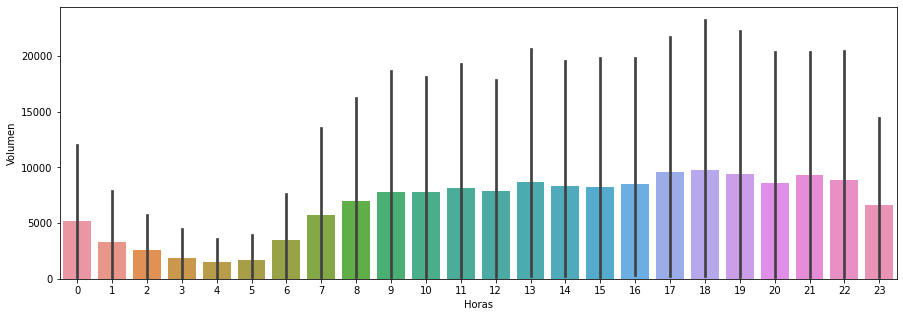

In [127]:
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(y='Volumen',x='Horas',data=df_modelo,ax=ax)

## 5.1-. Armado de modelo 

In [128]:
varc=['Horas','fk_id_Vendor','fk_id_Ratecode']

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
hiper_param = dict(criterion =["friedman_mse"],
splitter = ["best", "random"],
max_leaf_nodes = list(range(2, 100)),
min_samples_split= [2, 3, 4])

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [129]:
X = df_modelo[varc].copy()
y = df_modelo['Volumen'].copy()

In [130]:
Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.7)

In [131]:
Xt.shape,Xv.shape

((175, 3), (76, 3))

In [132]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                    hiper_param ,
                    verbose=1, 
                    cv=10,
                    scoring='explained_variance',
                    n_jobs=-1)

In [133]:
grid.fit(Xt,yt)

Fitting 10 folds for each of 588 candidates, totalling 5880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 3232 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 5880 out of 5880 | elapsed:   43.9s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='explained_variance', verbose=1)

In [134]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_leaf_nodes': 49,
 'min_samples_split': 3,
 'splitter': 'best'}

In [135]:
grid.best_score_

0.9742975442336752

Podemos ver que tenemos un muy buen score, asi que utilizaremos ese modelo 

In [136]:
modelo = grid.best_estimator_

In [137]:
modelo.fit(Xt,yt)

DecisionTreeRegressor(criterion='friedman_mse', max_leaf_nodes=49,
                      min_samples_split=3, random_state=42)

In [138]:
print(modelo.score(Xt,yt))
print(modelo.score(Xv,yv))

0.9975733483691142
0.9769030139951516


In [139]:
print(mean_absolute_error(y_true=yt,y_pred=modelo.predict(Xt)))
print(mean_absolute_error(y_true=yv,y_pred=modelo.predict(Xv)))

205.79271148459387
880.8300374097008


In [140]:
df_Apredic=df_modelo.copy()

In [141]:
df_Apredic['Volpredict']=modelo.apply(df_modelo[varc])

In [142]:
df_Apredic

,Horas,fk_id_Vendor,fk_id_Ratecode,fk_id_PUZone,Volumen,Volpredict
0,0,1,1,4572776,29756,17
1,0,1,2,90931,666,59
2,0,1,3,35978,198,83
3,0,1,4,2339,14,79
4,0,1,5,3513,25,78
...,...,...,...,...,...,...
246,23,2,2,65743,483,90
247,23,2,3,20580,117,62
248,23,2,4,2786,16,82
249,23,2,5,3240,23,78


In [147]:
np.mean(df_modelo['Volumen'])

6675.585657370518

In [123]:
for i in range(0,len(df_Apredic)):
    if df_Apredic["Volumen"][i] = df_Apredic['Volpredict'][i]:
        print(i, df_Apredic["Volumen"][i], df_Apredic['Volpredict'][i])

In [114]:
len(error)

3

In [110]:
for i in range(0,len(data2)):
    if data2["Volume"][i] != y_pred[i]:
        print(i, data2["Volume"][i], y_pred[i] )

ValueError: too many values to unpack (expected 2)